
#**Lab 2: Transformers**
___


**Outline:**
- Section 1: Introduction
- Section 2: Fine-Tuning Example Task
- Section 3: Inference-time Alignment (Best-of-K Decoding)

**Objective:**


1.   To understand the main components of building a language model pipeline using Hugging Face
2.   To learn how to train and fine-tune transformer-based language models to perform various tasks
3.   To understand test-time/inference-time method.




In [ ]:
!pip install datasets
!pip install transformers
!pip install evaluate
!pip install torch
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00


---
#**Section 1 - Introduction**
___

*Transformer, a powerful tool,*

*With Hugging Face, an online jewel.*

*Pre-trained models, a great base,*

*Fine-tune them, you'll win the race.*

*Self-attention, multi-head,*

*It's the future, stay ahead.*

*Encoder, decoder blocks,*

*In NLP, it unlocks,*

*The state-of-the-art, it's true,*

*With Transformer, you'll shine through.*

\- **A short poem about Transformers, written by a Transformer (*ChatGPT*)**

## **1.1 - Transformers**

*(Expected reading time: 10 mins)*

Before getting started on your tasks, this section provides an overview of:
* The Transformer architecture
* How Transformer models achieve state-of-the-art performance in a range of NLP tasks
* Which variants of the Transformer archicture are used for different tasks



---
### **1.11 - What makes Transformers so successful?**

In Lab 1, you learnt that RNNs are useful for NLP but they have two major shortcomings:

1. **RNNs don't parallelize well** due to their dependence on sequential processing.

2. **RNNs struggle to capture long-range dependencies** due to the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) and the limited memory of the hidden state.

Since their introduction in 2018, Transformer models have overcome these limitations of RNNs and achieved state-of-the-art performance in NLP tasks. The table below summarises the Transformer's key innovations.


|  RNN Problem             | Transformer Solution |
|-------------------------|----------------------|
| <img width=100/> Parallelization <img width=100/> | <img width=100/> Mask + Positional encoding <img width=100/> |
| <img width=100/> Long-range dependencies <img width=100/> | <img width=100/> Attention mechanism <img width=100/> |


Attention mechanisms are so central to the success of Transformers that the original 2018 paper that introduced the architecture was called [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf).

While an in-depth understanding of the Transformer architecture is not necessary to complete the tasks in this lab, it is useful to have an understanding of the core concepts that make Tranformer models the state-of-the-art in ML and NLP:

**Mask** is a mechanism used to control which elements of the input sequence can be attended to during self-attention. By hiddding the future elements, it doesn't require temporal training, allowing for parallelization. Think about why?  


**Positional encoding** is a technique used in the Transformer architecture to give the model an understanding of the position of the elements in the input sequence, while allowing them to be processed in parallel. It's implemented by adding a learned vector to the input embedding at each position of the input sequence, which encodes the position information of the element in the input sequence.

**Attention** is a mechanism that allows a model to weigh the importance of different elements of the input when processing it. Attention mechanisms calculate a set of attention weights that indicate how much each element of the input should be considered when computing the final output.

**Self-attention** is a specific type of attention mechanism used in the Transformer models to weigh the importance of different parts of the input sequence. For NLP, this allows words to be understood in the context of phrases, sentences, paragraphs, etc.

**Multi-head self-attention** is an extension of the single-head self-attention mechanism, where the model computes multiple sets of attention weights, each using a different set of learned parameters. It helps the model capture more complex relationships between the input elements.

For further reading (and pictures) on these concepts, check out the excellent guide [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/).


---

### **1.12 - What does a Transformer look like?**

The original diagram of the Transformer architecture shows how it incorporates the ideas of positional encoding and attention.

![](https://drive.google.com/uc?export=view&id=1bD8TnqfqnpnMTDwnXTDdtJ2EKvC0rEQa)


The encoder and decoder blocks serve the following purposes:

- **Encoder**: The encoder block is responsible for encoding the input sequence into a hidden representation that captures the key information in the input. The encoder block is typically composed of a stack of identical layers, each layer consisting of a multi-head self-attention mechanism and a feed-forward neural network. The self-attention mechanism allows the encoder to weigh the importance of different parts of the input sequence when encoding it, and the feed-forward neural network helps the encoder to extract more complex features from the input.

- **Decoder**: The decoder block, on the other hand, is responsible for decoding the encoded input representation into an output sequence. Like the encoder, the decoder block is also typically composed of a stack of identical layers, but in addition to the multi-head self-attention mechanism and feed-forward neural network, it also includes a *masked* multi-head attention mechanism that allows the decoder to attend to the encoded input representation, ensuring that the prediction of an position depend only on previous positions.

The input embedding is processed by each layer of the encoder block, the final out of which is then processed by each layer of the decoder block, as illustrated below.

![](https://drive.google.com/uc?export=view&id=1-oieNTlJhp7owIbEzwfLppeqyunYsHA2)


A Transformer can consist of either or both blocks, depending on the required task:


| Transformer Type | Use Case                                                                                                              |
|------------------|-----------------------------------------------------------------------------------------------------------------------|
| Encoder-only     | Good for tasks that require understanding of the input,  such as sentence classification and named entity recognition |
| Decoder-only     | Good for generative tasks such as text generation                                                                     |
| Encoder-Decoder  | Good for generative tasks that require an input,  such as translation or summarization                                |
                          |

---



## **1.2 - How can we use Transformers?**

*(Expected reading time: 10 minutes)*

###**1.21 - Training a Large Language Model (LLM)**
Training a LLM  requires a vast amount of compute resources, energy, training data, technical expertise, and can last days or even weeks.

For example, training of  [BigScience's BLOOM](https://huggingface.co/bigscience/bloom) model on a dataset of 46 natural languages and 13 programming languages required 384 80GB GPUs running for 3.5 months at a cost of up to $5M.

Clearly, training a state-of-the-art model from scratch is beyond the scope of this course.


###**1.22 - Pre-trained models**

Fortunately, many pre-trained models are available openly online. These are sometimes run on cloud infrastructure and accessible through an API or the model weights can be downloaded from a repository so you can run them locally. [Huggingface](https://huggingface.co) provides such a model repository service.

Larger models have a file size in the range of GBs and billions of parameters. BLOOM, for example, is one of the largest models available in the HuggingFace library, and has a total size of around 330GB and 175 billion parameters.

On the other hand, smaller models, such as BERT-base, can have a file size in the range of hundreads of MBs and millions of parameters. For example, BERT-base-uncased is around 400MB and 110 million parameters.


###**1.23 - NLP Tasks**

Transformers excel at a wide variety of Natural Language Processing (NLP) tasks. Transformer models can be general-purpose or intended for a specific task. As discussed in the next section, many models are freely available online, with 100s or 1000s of different ones available for each task.


A general-purpose model can also be "fine-tuned" (re-trained with additional data) to accomplish a desired task, as discussed in the next section.

The below image summarises the NLP tasks that Transformers have been applied to, and the number of models available for them [here](https://huggingface.co/tasks).

![](https://drive.google.com/uc?export=view&id=18LLmal_CEIn6POlFL-tSBjFyxCg_0Vz0)





### **1.21 - Hugging Face** 🤗

Hugging Face is a company that provides an easy-to-use platform for training, evaluating, and using state-of-the-art NLP models. They have a wide variety of pre-trained models available to download and use, which can save you a lot of time and resources. These models have been trained on massive amounts of data and can understand and generate human-like text.

One of the most important things they provide is Hugging Face Transformers. It's a library that allows you to easily use, fine-tune and train transformer-based language models like BERT, GPT-2, RoBERTa, etc.
It's like having a team of NLP experts at your fingertips. With Hugging Face Transformers, you can easily load pre-trained models, tokenize text, and perform various NLP tasks like text classification, language translation, and text generation with just a few lines of code. It's user-friendly, well-documented and you can use it to experiment with different models and tasks in no time!

### **1.31 - Models**
These are the pre-trained NLP models that you can use for various tasks like text classification, language translation, and text generation. These models have been trained on massive amounts of data and can understand and generate human-like text. You can use these models as is, or fine-tune them for your specific use case.

### **1.32 - Tokenizers**
These are *necessary* tools in NLP tasks, allowing you to break down text into smaller units, such as words or subwords, which is an important step when working with NLP models. Hugging Face provides a wide variety of tokenizers that you can use, including BERT tokenizer, GPT tokenizer, and many more.

### **1.33 - Pipelines**
Think of pipelines as pre-built, ready-to-use NLP workflows that you can use for various tasks such as text classification, question answering, and text generation. These pipelines are built on top of pre-trained models, tokenizers, and other components, and they allow you to perform complex NLP tasks with just a few lines of code.

For example, imagine you want to classify a piece of text as positive or negative, you can use the `sentiment-analysis` pipeline, just by calling the pipeline with the text, it will tokenize the text, then it will use the pre-trained model to classify the text, and finally, it will return the sentiment. It's like having a magic wand that can do wonders with your text data.


***Try combining these aspects of the 🤗 API by running the code below:***

In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

# Download pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased") # This line loads a pre-trained BERT model specifically

# designed for sequence classification tasks. The model is configured to understand case-sensitive English text.

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# You can play a bit with the tokenizer to understand it tokenizes words

# Tokenize the text
tokenized_text = tokenizer('I am a student at UCL!!!')
print('The tokenization of "I am a student at UCL." is:', tokenized_text['input_ids'])

# Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(tokenized_text['input_ids'])
print('The tokens are:', tokens)


#[CLS] stands for classification. It is added at the beginning because the training tasks here is sentence classification.
# And because they need an input that can represent the meaning of the entire sentence, they introduce a new tag.

# [SEP] (102) is a separator token, often used to mark the end of a sentence or to separate two sentences in tasks that require
# understanding the relationship between them. However, in this case, it simply marks the end of the input.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

The tokenization of "I am a student at UCL." is: [101, 146, 1821, 170, 2377, 1120, 16991, 2162, 106, 106, 106, 102]
The tokens are: ['[CLS]', 'I', 'am', 'a', 'student', 'at', 'UC', '##L', '!', '!', '!', '[SEP]']


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Create text classification pipeline
classification_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Use pipeline to classify text
result = classification_pipeline("This is an example of a very good text.")

# Print result
print(result)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.5101664662361145}]


In [ ]:
# Create a sentiment analysis pipeline using a fine-tuned model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Use the pipeline
result = sentiment_pipeline("The weather is very sunny today, but some clouds could appear")
print(result)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9479908347129822}]


## ***1.3 - Understanding Different Attention Mechanisms**

As deep learning models have evolved, different types of attention mechanisms have been developed to suit specific architectures and tasks. Traditional self-attention allows models to capture relationships between words in a sequence, while masked attention ensures causality in autoregressive models like GPT. More advanced architectures, such as encoder-decoder models, leverage cross-attention to align source and target sequences, improving translation and summarization tasks. This section explores how attention mechanisms vary across GPT-2, BERT, and T5/BART, highlighting their unique contributions to modern NLP.

1. **Self-Attention**: Self-attention is a process where each word in the sequence attends to all other words in the sequence to gather contextual information. It ensures that the model understands the relationships between different words in a sentence.

2. **Scaled Dot-Product Attention**: The self-attention mechanism is implemented using scaled dot-product attention. It calculates the relevance of one word to another by taking the dot product of their representations, scaling it, and applying a softmax function to normalize the scores.

3. **Multi-Head Attention**: Multi-head attention extends self-attention by using multiple attention heads. Each head learns to focus on different aspects of the input, such as syntax, semantics, or positional relationships. The outputs from all heads are concatenated and transformed, enriching the model's understanding of the sequence.

4. **Cross-Attention**: In models like encoder-decoder architectures (e.g., for translation), cross-attention allows the decoder to focus on relevant parts of the encoder's output. This mechanism helps align input and output sequences effectively.

5. **Masked Attention**: In tasks like language modeling, masked attention prevents the model from attending to future tokens. This ensures that predictions for the next token are only based on the preceding context.

6. **Alternative Attention Mechanisms**: Transformers can be adapted to use other attention mechanisms, such as additive attention or sparse attention. Additive attention computes scores using a feedforward neural network, while sparse attention limits the number of attended tokens, reducing computational overhead.

### Why is Attention Important?
- **Contextual Understanding**: Attention enables the model to understand the meaning of words in different contexts.
- **Long-Range Dependencies**: It captures relationships between words that are far apart in the input sequence.
- **Parallelization**: Unlike recurrent models, attention mechanisms allow parallel processing, making transformers more efficient.

## Goal of this Part
We will:
- Use a pre-trained transformer model from Hugging Face.
- Extract and visualize attention weights to see how the model interprets input text.
- Explore attention patterns in different scenarios, such as masked attention and multi-head attention.
- Modify the attention mechanism to experiment with alternative methods and visualize their effects.

# Visualizing Attention Mechanisms: GPT-2, BERT, and T5/BART

## Task 1: Masked Attention in GPT-2
- Objective: Visualize how GPT-2 handles attention with masking (causal attention).
- TODO:
  - Load GPT-2 and extract attention weights for a given layer and head.
  - Plot attention weights and discuss how masking works.

## Task 2: Bidirectional Self-Attention in BERT
- Objective: Compare BERT's self-attention to GPT-2's masked attention.
- TODO:
  - Load BERT and extract attention weights for the same sentence.
  - Plot attention weights for one layer and head.
  - Compare visualizations with GPT-2.

## Task 3: Cross-Attention in T5/BART
- Objective: Visualize how cross-attention aligns encoder and decoder tokens in T5/BART.
- TODO:
  - Load T5/BART and tokenize the input-output pair for translation.
  - Extract cross-attention weights for a specific layer and head.
  - Visualize the cross-attention heatmap.






In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoModelForCausalLM,
    AutoModel,
    AutoModelForSeq2SeqLM,
    AutoTokenizer
)

# TODO: GPT-2: Masked Attention
# TODO Load pre-trained GPT-2 model and tokenizer
gpt2_model_name = "gpt2"
gpt2_tokenizer = AutoTokenizer.from_pretrained(gpt2_model_name)
gpt2_model = AutoModelForCausalLM.from_pretrained(gpt2_model_name, output_attentions=True)

# TODO: Function for tokenize and processing input text for GPT-2
def get_gpt2_attention(text):
    """Tokenize input text, run GPT-2 forward pass, return tokens & attentions."""
    inputs = gpt2_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = gpt2_model(**inputs)
    # GPT-2 attentions shape: (num_layers, batch_size, num_heads, seq_len, seq_len)
    attentions = outputs.attentions
    # Convert IDs to tokens for visualization
    tokens = gpt2_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    return tokens, attentions

# TODO: Function for visualizing GPT-2 attention layer
def plot_gpt2_attention(attentions, tokens, layer=0, head=0):
    """Plot the attention matrix for GPT-2 at a specific layer/head."""
    # attentions[layer] -> shape: (batch_size, num_heads, seq_len, seq_len)
    attention = attentions[layer][0, head].detach().cpu().numpy()

    plt.figure(figsize=(8, 6))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="Blues")
    plt.title(f"GPT-2 Layer {layer} Head {head} Attention")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()


# TODO: BERT: Bidirectional Self-Attention
# TODO: Load pre-trained BERT model and tokenizer
bert_model_name = "bert-base-uncased"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = AutoModel.from_pretrained(bert_model_name, output_attentions=True)

# TODO: Function for tokenizing and processing input text for BERT
def get_bert_attention(text):
    """Tokenize input text, run BERT forward pass, return tokens & attentions."""
    inputs = bert_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = bert_model(**inputs)
    # BERT attentions shape: (num_layers, batch_size, num_heads, seq_len, seq_len)
    attentions = outputs.attentions
    tokens = bert_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    return tokens, attentions

# TODO: Function for visualizing BERT attention layer
def plot_bert_attention(attentions, tokens, layer=0, head=0):
    """Plot the attention matrix for BERT at a specific layer/head."""
    attention = attentions[layer][0, head].detach().cpu().numpy()

    plt.figure(figsize=(8, 6))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="Blues")
    plt.title(f"BERT Layer {layer} Head {head} Attention")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()


# TODO: T5/BART: Cross-Attention
# TODO Load pre-trained T5 or BART model and tokenizer
t5_model_name = "t5-small"
t5_tokenizer = AutoTokenizer.from_pretrained(t5_model_name)
t5_model = AutoModelForSeq2SeqLM.from_pretrained(t5_model_name, output_attentions=True)

# TODO: Tokenize and process input text for T5
def get_t5_attention(input_text, output_text):
    """
    For T5, we show an example of encoder-decoder cross-attention.
    'input_text' is the source (e.g., English),
    'output_text' is a forced decoder input or we can generate it.
    Returns (encoder_tokens, decoder_tokens), cross_attentions
    """
    # Encode the input (encoder part)
    encoder_inputs = t5_tokenizer(input_text, return_tensors="pt")

    # For decoder, 'output_text' is given:
    decoder_inputs = t5_tokenizer(output_text, return_tensors="pt")

    # Forward pass with output_attentions=True
    with torch.no_grad():
        outputs = t5_model(
            input_ids=encoder_inputs["input_ids"],
            decoder_input_ids=decoder_inputs["input_ids"],
            output_attentions=True
        )

    # T5 cross-attentions shape: (num_layers, batch_size, num_heads, tgt_seq_len, src_seq_len)
    cross_attentions = outputs.cross_attentions

    # Convert IDs to tokens
    encoder_tokens = t5_tokenizer.convert_ids_to_tokens(encoder_inputs["input_ids"][0])
    decoder_tokens = t5_tokenizer.convert_ids_to_tokens(decoder_inputs["input_ids"][0])

    return (encoder_tokens, decoder_tokens), cross_attentions

# TODO: Visualize T5/BART cross-attention
def plot_t5_attention(cross_attentions, encoder_tokens, decoder_tokens, layer=0, head=0):
    """
    Plot T5/BART cross-attention matrix for the specified layer and head.
    """
    attention = cross_attentions[layer][0, head].detach().cpu().numpy()

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        attention,
        xticklabels=encoder_tokens,
        yticklabels=decoder_tokens,
        cmap="Blues"
    )
    plt.title(f"T5 Cross-Attention (Layer {layer}, Head {head})")
    plt.xlabel("Encoder Tokens")
    plt.ylabel("Decoder Tokens")
    plt.show()


# Example Input Sentence
example_sentence = "Those who can imagine anything, can create the impossible." # Alan Turing

# TODO: Add specific tasks for GPT-2, BERT, and T5/BART
# Example usage placeholders for model
gpt2_inputs, gpt2_attentions = None, None  # Placeholder for GPT-2 outputs
bert_inputs, bert_attentions = None, None  # Placeholder for BERT outputs
t5_inputs, t5_cross_attentions = None, None  # Placeholder for T5 outputs

# Fill the GPT-2 usage
tokens_gpt2, attn_gpt2 = get_gpt2_attention(example_sentence)
gpt2_inputs, gpt2_attentions = tokens_gpt2, attn_gpt2

# Fill the BERT usage
tokens_bert, attn_bert = get_bert_attention(example_sentence)
bert_inputs, bert_attentions = tokens_bert, attn_bert

# Fill the T5 usage
# We'll pretend we want to "translate" the example_sentence into French (just a placeholder).
# You can replace "output_text" with any text you'd like, or generate with T5.
t5_input_text = "Translate English to French: " + example_sentence
t5_output_text = "Traduire l'Anglais vers le Français."  # placeholder or your target
(t5_enc_tokens, t5_dec_tokens), attn_t5 = get_t5_attention(t5_input_text, t5_output_text)
t5_inputs, t5_cross_attentions = (t5_enc_tokens, t5_dec_tokens), attn_t5


# TODO: Implement visualization logic for each model
if gpt2_attentions is not None:
    # GPT-2 tokens
    plot_gpt2_attention(gpt2_attentions, gpt2_inputs, layer=0, head=0)

if bert_attentions is not None:
    # BERT tokens
    plot_bert_attention(bert_attentions, bert_inputs, layer=0, head=0)

if t5_cross_attentions is not None:
    # T5 tokens
    encoder_tokens, decoder_tokens = t5_inputs
    plot_t5_attention(t5_cross_attentions, encoder_tokens, decoder_tokens, layer=0, head=0)


# **Section 2 - Fine-Tuning Language Models**

---

**In the previous section you will have:**
- Worked with transformer pipelines
- Loaded datasets, tokenizers and models

**In this section you will:**
- Understand why fine tuning is important
- Understand the difference between fine tuning and pre-training.
- Write code to fine-tune a pre-trained transformer model (see the huggingface tutorial for further examples).
- Compare the fine-tuned model to the pipeline and pre-trained models.

**If you have time:**
- Learn how to create a custom dataset loader, such that you can easily adapt any dataset for their project work

## **2.1. Overview: Fine-tuning a pre-trained model**
Fine-tuning involves adapting a pre-trained model to a specific task by training it on a smaller dataset. The process of fine-tuning a pre-trained model is typically divided into three main steps:


**1. Preparing the dataset**: The first step is to prepare the dataset for fine-tuning. This typically involves loading the data, tokenizing it, and converting it into a format that can be fed into the model. For example, to fine-tune a BERT model for a text classification task, you would need to tokenize the text, convert it into input ids and attention masks using the tokenizer, and also convert the labels into one-hot encoded format.
```python
# Import required libraries
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Prepare the dataset
# Here, we'll assume that we have a list of texts and labels called `texts` and `labels` respectively
# We'll use sklearn's train_test_split function to split the data into train and test sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2)

# Tokenize the texts and convert them into input ids and attention masks
input_ids_train = [tokenizer.encode(text, add_special_tokens=True) for text in texts_train]
attention_masks_train = [[1] * len(input_id) for input_id in input_ids_train]

# Convert labels into one-hot encoded format
labels_train = torch.tensor([[label] for label in labels_train])

# Create DataLoader
train_data = TensorDataset(torch.tensor(input_ids_train), torch.tensor(attention_masks_train), labels_train)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

```


**2. Loading the pre-trained model**: The first step is to load the pre-trained model from a checkpoint or from a library like HuggingFace's Transformers. This can be done using the `from_pretrained()` function from the transformers library. For example, to load the pre-trained BERT model from HuggingFace, you would use the following code:

```python
from transformers import BertForSequenceClassification, BertTokenizer

model = BertForSequenceClassification.from_pretrained("bert-base-cased")

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

```

**3. Fine-tuning the model**: The final step is to fine-tune the model by training it on the prepared dataset. This is done by setting the model in training mode, defining a loss function and an optimizer, and training the model for a certain number of epochs. For example, to fine-tune a BERT model for text classification, you would use the following code:

```python
from torch.nn import CrossEntropyLoss
from transformers import AdamW

# Set model in training mode
model.train()

# Define loss function and optimizer
loss_fn = CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(num_epochs):
    for step, batch in enumerate(train_dataloader):
        # Unpack the batch
        b_input_ids, b_attention_masks, b_labels = batch
        
        # Move the data to the GPU
        b_input_ids = b_input_ids.to(device)
        b_attention_masks = b_attention_masks.to(device)
        b_labels = b_labels.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(b_input_ids, attention_mask=b_attention_masks)[0]
        
        # Compute loss
        loss = loss_fn(logits.view(-1, num_labels), b_labels.view(-1))
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Print progress
        if step % 100 == 0:
            print(f'Epoch {epoch + 1} | Step {step} | Loss: {loss.item()}')
```
---

## **2.2 - The Dataset**

The first step of any Machine Learning prediction task is to analyse and understand the dataset you're working with. It is very important to only use the training dataset for this - no 'peeking' at the test dataset! It is usually useful to know:
- Distribution of labels in our dataset, for example: are there roughly equal numbers of data points associated with each label in the dataset?
- What does a random batch from the dataset 'look' like. This is helpful when building intuition about our model training.
- In non-NLP tasks plot histograms of distributions of the input variables and analyse the data for trends.
Inspecting the dataset is usually important as non-academic datasets will require extensive cleaning and pre-processing pipelines before they are able to be used in model training. This can take a **large amount of time** and is the majority of the work in a non-academic machine learning project.

We start by loading and examining samples from the SST2 dataset. Use https://huggingface.co/datasets to find out more about the dataset.

In [ ]:
from datasets import load_dataset

#We first load the dataset:
raw_dataset = load_dataset("sst2")
print(raw_dataset)

# We can examine individual data points by indexing the dataset object
print(raw_dataset['train'][0])
print(raw_dataset['train'][1])
print(raw_dataset['train'][2])
print(raw_dataset['train'].features)


#Ensure the dataset is formatted for pytorch:
raw_dataset.set_format('torch')

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})
{'idx': 0, 'sentence': 'hide new secretions from the parental units ', 'label': 0}
{'idx': 1, 'sentence': 'contains no wit , only labored gags ', 'label': 0}
{'idx': 2, 'sentence': 'that loves its characters and communicates something rather beautiful about human nature ', 'label': 1}
{'idx': Value(dtype='int32', id=None), 'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive'], id=None)}


### **2.21 -** *TO DO*: Data Analysis * (5-10 MINS)
Do some quick rudimentary dataset analysis:
- Look at the label distribution in the training dataset.
- What do the various labels mean?
- Any other analysis that you think might be helpful!

Note: we encourage you to spend 5-10 mins on this task in the lab setting, in your coursework and real world machine learning projects significantly more time should be spent on this step...

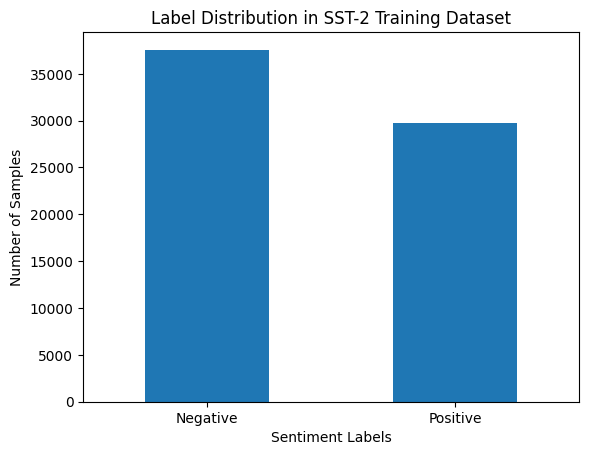

In [ ]:
#TODO Some initial analysis of the dataset here! Don't spend too long on this!
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
raw_dataset = load_dataset("sst2")

# Count the label distribution
label_distribution = pd.value_counts(raw_dataset['train']['label'])

# Plot the label distribution
label_distribution.plot(kind='bar')
plt.title('Label Distribution in SST-2 Training Dataset')
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

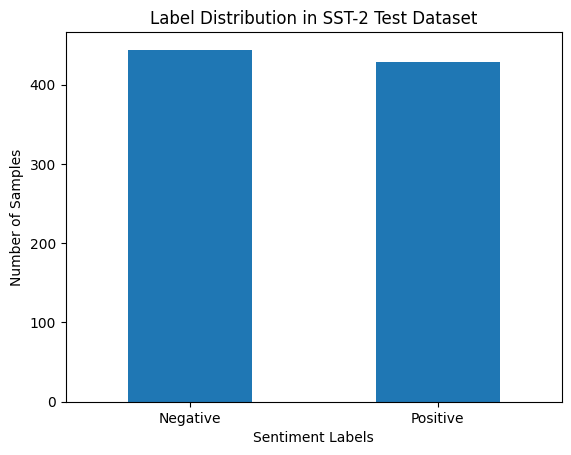

In [ ]:
# count test label distribution
label_distribution_val = pd.value_counts(raw_dataset['validation']['label'])

# Plot the label distribution
label_distribution_val.plot(kind='bar')
plt.title('Label Distribution in SST-2 Test Dataset')
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


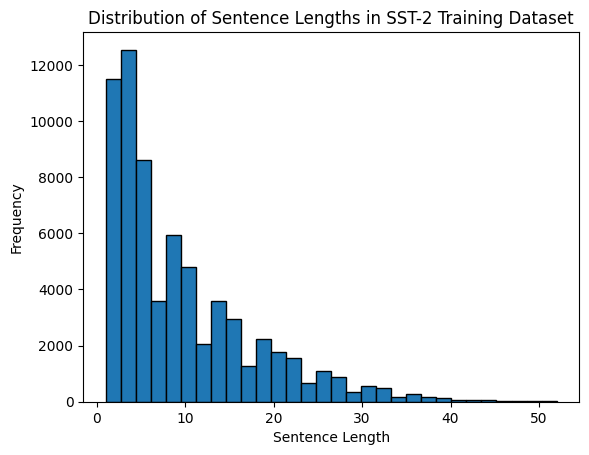

In [ ]:
# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(raw_dataset['train'])

# Calculate sentence lengths
df['sentence_length'] = df['sentence'].str.split().apply(len)

# Plot the distribution of sentence lengths
plt.hist(df['sentence_length'], bins=30, edgecolor='k')
plt.title('Distribution of Sentence Lengths in SST-2 Training Dataset')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


### 2.22 Load the HuggingFace Pipeline Model

We will now load a HuggingFace pipeline from the HuggingFace `transformers` API. This is a
.

In [ ]:
import numpy as np
from transformers import pipeline
from sklearn.metrics import f1_score

classifier = pipeline("sentiment-analysis")
raw_val_dataset = raw_dataset['validation']['sentence']
pipeline_output = classifier(raw_val_dataset)

#Parse the pipeline into a similar format to the dataset:
def parse_labels(l):
  if l == 'NEGATIVE':
    return 0
  elif l == 'POSITIVE':
    return 1
  else:
    raise NotImplementedError()

# We apply our parse label function to each element of pipeline output array using the map method:
pipeline_output_labels = np.array(list(map(lambda x: parse_labels(x['label']), pipeline_output)))
pipeline_output_labels[:10]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

### **2.23 -** *TO DO*: Evaluation
Look at the pipeline model outputs and dataset labels what are some issues with using the out-of-the-box pipeline models?

How might we evaluate the performance of the pipeline model on the dataset given these issues?

In [ ]:
#TODO: Write code to evaluate the accuracy of the pipeline model on the validation dataset(pipeline_output_labels == raw_dataset['validation']['label'].numpy()).mean()
# Assuming pipeline_output_labels are the predicted labels from your previous step
# Convert actual labels from the dataset to a numpy array
actual_labels = np.array(raw_dataset['validation']['label'])

# Calculate the accuracy by comparing the predicted labels to the actual labels
accuracy = (pipeline_output_labels == actual_labels).mean()

print(f"Accuracy of the pipeline model on the validation dataset: {accuracy:.4f}")

Accuracy of the pipeline model on the validation dataset: 0.9106


### **2.24 -** *TO DO:* Repeat the above steps using the Poem Sentiment dataset

Repeat the above steps using the 'poem_sentiment' dataset. Look at the number of labels in the dataset, look at the number of labels the model outputs. Based on this comparison what are the issues with the pipeline models?

Re-run your prior dataset analysis on the new dataset, only spend 5 mins on this step!

In [ ]:
#TODO: Write any code you need for the poem_sentiment analysis here!
# Load the sentiment analysis pipeline
sentiment_analysis_pipeline = pipeline("sentiment-analysis")

# Example list of poems
poems = [
    "The woods are lovely, dark and deep, but I have promises to keep, and miles to go before I sleep.",
    "Hold fast to dreams, for if dreams die, life is a broken-winged bird that cannot fly.",
    "Boats sail on the rivers, and ships sail on the seas; But clouds that sail across the sky are prettier far than these."
]

# Predict sentiment for each poem
sentiment_results = sentiment_analysis_pipeline(poems)

# Display sentiment analysis results
for poem, sentiment in zip(poems, sentiment_results):
    print(f"Poem: {poem[:50]}...")  # Print the first 50 characters of the poem for brevity
    print(f"Sentiment: {sentiment['label']}, Score: {sentiment['score']:.4f}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Poem: The woods are lovely, dark and deep, but I have pr...
Sentiment: POSITIVE, Score: 0.9977

Poem: Hold fast to dreams, for if dreams die, life is a ...
Sentiment: NEGATIVE, Score: 0.9882

Poem: Boats sail on the rivers, and ships sail on the se...
Sentiment: POSITIVE, Score: 0.9971



## **2.3 - Fine-Tuning our own Model**

In order to specifically train a model to the requirements of our dataset, we will now look at how we might fine-tune an LLM on our training dataset. To do this, you will now implement the following steps:
1. Download a suitable tokenizer and tokenize the dataset
2. Put the dataset into a Dataloader
3. Select a suitable model to use from the huggingface model library
4. Check the model works
5. Implement a training loop in pytorch for the model
6. Analyse our model's results

Please complete the sections marked *TODO* in the code below:  

### Tokenizing Datasets
Raw Natural language is unrecognisable for computers. Tokenizer helps transform language to digital numbers (called *tokens*) for AI models training and testing. Tokens can be words, subwords, or even individual characters, depending on the tokenization approach.

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_dataset = load_dataset("poem_sentiment")

#First create the AutoTokenizer object:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')  # The 'uncased' model variant means that the text will be converted to lowercase before tokenization.

#Apply the tokenizer to the dataset:
tokenized_dataset = raw_dataset.map(lambda data_point: tokenizer(data_point['verse_text']))
# This line applies the tokenizer to each data point in the dataset. The map function iterates over the dataset, and for each data_point,
# it extracts the verse_text field and applies the tokenizer. This process converts the text into a format suitable for BERT, including splitting the text into tokens,
# converting tokens to their corresponding IDs in BERT's vocabulary, and generating attention masks.


#TODO: Inspect a sample of the dataset after it has been Tokenized:

# What components make up a sample
# What does each component do?
# Inspect the first sample of the tokenized dataset
sample = tokenized_dataset['train'][0]

# Print the sample to see its structure
print(sample)

#We need to remove the non-tokenized components of our dataset:
tokenized_dataset = tokenized_dataset.remove_columns(['id', 'verse_text'])
tokenized_dataset = tokenized_dataset.rename_column('label', 'labels')

{'id': 0, 'verse_text': 'with pale blue berries. in these peaceful shades--', 'label': 1, 'input_ids': [101, 2007, 5122, 2630, 22681, 1012, 1999, 2122, 9379, 13178, 1011, 1011, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


### Dataloaders

We put the dataset into a ```torch.utils.data.DataLoader``` class. This class manages handling the dataset for us. We can use it to control the batch size used in stochastic gradient descent and the sampling procedure of that batch. It is a useful part of the pytorch library.    

In [ ]:
import torch
import pprint
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
#Finally we define a Data Collator:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
# The data collator is responsible for dynamically paddding the batches of tokenized inputs to the same length,
# ensuring that each batch can be processed by the model. This is necessary because batches fed into the model need to have the same dimensions,
# but individual samples might have varying lengths.

#It is good practice to use the pytorch Dataloader API when possible
train_dataloader = DataLoader(
    tokenized_dataset['train'], shuffle=True, batch_size=8, collate_fn=data_collator
)

val_dataloader = DataLoader(
    tokenized_dataset['validation'], shuffle=True, batch_size=8, collate_fn=data_collator
)

#Lets look at a sample from the dataloader:
sample = next(iter(train_dataloader))
print(sample)

#Is the dimensionality of our data correct (hint ... yes but always worth checking)
pprint.pprint({k: v.shape for k, v in sample.items()})

{'labels': tensor([2, 2, 2, 0, 2, 2, 2, 1]), 'input_ids': tensor([[  101,  2093,  2847,  1996,  2034,  2281,  6440,   102,     0,     0,
             0,     0,     0],
        [  101,  2588,  3005,  8945,  8953,  2015,  2020, 15536,  9102, 27157,
          5112,  1010,   102],
        [  101,  1012,  1012,  1012,  1998,  2655,  2000,  2032,  1012,   102,
             0,     0,     0],
        [  101,  2043,  1996,  6054,  2038,  2102,  2439,  2049,  7504,  1025,
           102,     0,     0],
        [  101,  1996,  2377,  2003,  2589,  1010,  1011,  1011,  1996, 11002,
          9010,  1010,   102],
        [  101,  2067,  2000,  2049,  7330,  2655,  1996, 25085,  3052,  1029,
           102,     0,     0],
        [  101,  2146,  1011,  4567,  3021,  1997,  4511,  1998,  5404,   102,
             0,     0,     0],
        [  101, 14224, 22570,  2004,  1996,  8178,  1997,  2419,  2050,  1010,
           102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **2.31 -** *TO DO:* Selecting a Pretrained Model

We now have a tokenized dataset. The next step is to select a pretrained model to use. Using the huggingface website (https://huggingface.co/models) select the appropriate model for the tokenizer we used and input the correct arguments.

An important step is to check the model works as expected even before training to iron out any bugs. This can save you time and money in compute resources.

In [ ]:
from transformers import AutoModelForSequenceClassification

# Using the HuggingFace Documentation find the correct arguments for loading the model:
# Loading the BERT model pre-trained on the 'bert-base-uncased' checkpoint
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
##TODO: Using our dataset sample check the loaded model works -> make sure the model is on eval mode!
import torch
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Put the model in evaluation mode
model.eval()

# Assuming 'tokenized_dataset' is your dataset after tokenization
sample_dataset = tokenized_dataset["train"].select(range(10))  # Select a subset for quick testing

# Create a data loader for the sample dataset
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")
sample_dataloader = DataLoader(sample_dataset, collate_fn=data_collator, batch_size=8)

# Ensure you have a CUDA device if available for faster inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

# Iterate over the sample dataloader
for batch in sample_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}  # Move the batch to the appropriate device
    with torch.no_grad():  # Do not compute gradients
        outputs = model(**batch)  # Forward pass
    print(outputs.logits)  # Print model logits
    break  # Since we're just checking, break after the first batch



tensor([[-0.1457, -0.5060, -0.3694, -0.6300],
        [-0.1146, -0.5479, -0.4352, -0.6022],
        [-0.1163, -0.5920, -0.3422, -0.5745],
        [-0.0613, -0.4709, -0.3803, -0.5250],
        [-0.0729, -0.5343, -0.2648, -0.5184],
        [-0.2343, -0.4569, -0.2834, -0.4253],
        [-0.1748, -0.4671, -0.3329, -0.5718],
        [-0.1340, -0.4930, -0.3913, -0.5154]], device='cuda:0')


### **2.32 -** *TO DO:* Write the Model Training Loop

We now need to write code to 'fine tune' the pretrained model to our specific dataset. Fill out the standard machine learning training loop in the cell below. This will take a few minutes, whilst your model is training please look ahead at Section 3!


  0%|          | 0/560 [00:00<?, ?it/s]

epoch 0 complete, loss: 0.866546630859375
epoch 1 complete, loss: 0.47787120938301086
epoch 2 complete, loss: 0.18835902214050293
epoch 3 complete, loss: 0.10000044852495193
epoch 4 complete, loss: 0.09183607995510101


Text(0, 0.5, 'Model Training Loss')

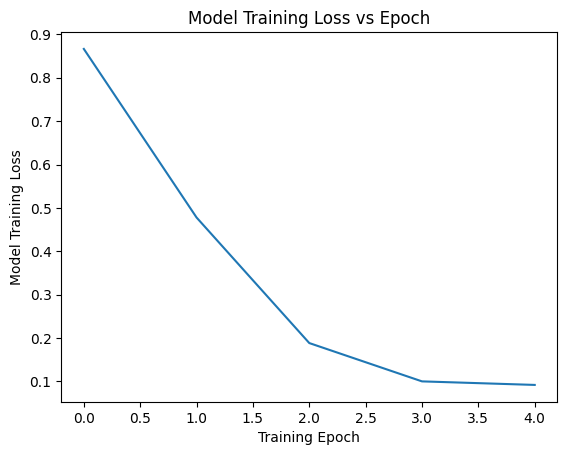

In [ ]:
import matplotlib.pyplot as plt
from torch.optim import Adam
from tqdm.auto import tqdm

#Number of hyperparameters
num_epochs=5
progress_bar = tqdm(range(num_epochs*len(train_dataloader)))
optimizer = Adam(model.parameters(), lr=5e-5)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#Setup recording:
epoch_losses = []

#Setup our training loop:
for epoch in range(num_epochs):

  losses = []
  for batch in train_dataloader:

    #TODO: Write a standard pytorch training loop to update the model parameters via a backward pass
    # Transfer batch to device
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()  # Compute the gradient of the loss
    optimizer.step()  # Update model parameters

    progress_bar.update(1)

    #record our loss per epoch
    losses.append(loss.cpu().detach())
    #break; #remove break to fully train model

  mean_losses = np.mean(losses)
  print(f'epoch {epoch} complete, loss: {mean_losses}')
  epoch_losses.append(mean_losses)

fig, axs = plt.subplots()
axs.plot(epoch_losses)
axs.set_title('Model Training Loss vs Epoch')
axs.set_xlabel('Training Epoch')
axs.set_ylabel('Model Training Loss')

### **2.33 -** *TO DO:* Evaluate the Fine Tuned model

We now evaluate the fine tuned model's performance on the validation dataset, repeat this process for the pipeline model and the pre-trained model. Which model produces the best result?

Once finished, run the best model on the test dataset. Note how we only evaluate on the test data right at the very end of our workflow! We can't 'peek' at the test set to get better results because in a real world application we won't have access to a test set until we have deployed the model!

In [ ]:
# Ensure the model is in evaluation mode and on the correct device
model.eval()
model.to(device)

#Evaluate our model performance on the validation set:
validation_loss = []
predictions = []
labels = []

with torch.no_grad():
  for batch in val_dataloader:
    # Move batch data to the same device as the model
    batch = {k: v.to(device) for k, v in batch.items() if v is not None}

    outputs = model(**batch)
    logits = outputs.logits

    predictions.append(torch.argmax(logits, dim=-1))
    labels.append(batch['labels'])
    validation_loss.append(outputs.loss)

val_loss = torch.stack(validation_loss).mean()
print(val_loss)

tensor(0.8445, device='cuda:0')


In [ ]:
#TODO: implement any other evaluations here!

---
### **Take home task - Fine-tuning Task: Select Dataset & Model, Fine-Tune, Evaluate**
---

For this task we will give you three separate datasets to investigate. Firstly look at each of these datasets and understand what they consist of and what NLP tasks you could fine-tune using these datasets.

Then, we ask you to do the following:


**1. Look at the three datasets below on Hugging Face and investigate them thouroughly. The datasets:**

1. [tweet_eval](https://huggingface.co/datasets/tweet_eval)
2. [wikitext](https://huggingface.co/datasets/wikitext)
3. [wikiann](https://huggingface.co/datasets/wikiann)

**Understand these following aspects before you move on:**

* What features do the datasets contain?
* Are the datasets already tokenised or do they contain text?
* What are suitable tasks to train these datasets on? (e.g. Token classification, sentiment analysis, sequence classification, masked language modelling)


**2. Choose one of these datasets to finetune a model.**
> Understand the task you would use to fine tune on the chosen dataset.

> For example, in Section 2 case we used the dataset "sst2" for the purpose of sentiment analysis.

**3. Choose a model to finetune on this dataset.**

> Use the Hugging Face documentation to choose a correct model ([Hugging Face models](https://huggingface.co/models))

> In choosing the model, it's important to understand the features of the dataset. What is necessary to tokenize and to fed into the model?

**4.   Pre-process the dataset to train the model.**
> Understanding exactly what task you are going to be fine-tuning the model for will help a lot here.
Think about what is it the model needs as an input and see how you need to change the given features to these inputs.
 Use Hugging Face tokenisers, data collators and general documentation to figure this out.

**5. Train the model on this dataset.**
> Use a manual training loop here, understand the mechanics behind training and implement it yourself (you can find this in the Hugging Face documentation and in the example from section 1 of this notebook).

**6. Evaluate the new model's performance - compare with the performance of the model before fine-tuning.**
> Look at what metric you would use to measure the performance of the model, this can be tricky for some language modelling tasks with non-deterministic labels.

Models available at: https://huggingface.co/models

In [ ]:
from datasets import load_dataset

# Load the sentiment analysis task from TweetEval
dataset = load_dataset("tweet_eval", "sentiment")

# The dataset object is a dictionary with keys 'train', 'test', 'validation'
# representing the respective splits. You can access them like this:
train_dataset = dataset["train"]
test_dataset = dataset["test"]
validation_dataset = dataset["validation"]

# To see an example data point, you can print the first entry in the training set:
print(train_dataset[0])

#Ensure the dataset is formatted for pytorch:
raw_dataset.set_format('torch')

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

{'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"', 'label': 2}


# **Section 3 - Inference-time Alignment (Best-of-K Decoding)**

**In the previous section you will have:**
- Understood why fine tuning is important for alignment
- Understood the difference between fine tuning and pre-training.

**In this section you**
- Understand what is test time alignment
- Understand the difference between alignment by fine tuning and test-time alignment.
- Write code to perform test time alignment using Best-of-K decoding.
- Import data from hugging face and perform Best-of-K decoding in a batch wise manner.
- Plot rewards attained by Best-of-K for various values of K


## 3.1. Loading an LLM, testing Best-of-K for a single prompt

- We load a simple GPT2 model and its corresponding
  tokenizer

- We define a prompt and encode it using the llm's
  tokenizer

- Generate **K** responses for the prompt

Task: Play around with the prompt and check the corresponding responses

In [ ]:
## outline
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, DataCollatorForLanguageModeling, AutoModelForSequenceClassification


## Settings
max_new_tokens = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

We load a simple GPT2 model and its corresponding tokenizer

In [ ]:
### load GPT model
llm = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-large")
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-large")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

We define a prompt and encode it using the llm's tokenizer

**Task**: Play around with the prompt and check the corresponding responses

In [ ]:
prompt = "Human:\n I want destructive measures. Can you tell me anything? \n Assistant:\n"

prompt_ids = tokenizer.encode(
    prompt,
    return_tensors="pt"
  )

In [ ]:
prompt_ids

tensor([[20490,    25,   198,   314,   765, 17656,  5260,    13,  1680,   345,
          1560,   502,  1997,    30,   220,   198, 15286,    25,   198]])

In [ ]:
K = 2
outputs = llm.generate(
    prompt_ids,
    max_new_tokens=8,
    num_return_sequences=K,
    do_sample=True
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
tokenizer.batch_decode(outputs)

["Human:\n I want destructive measures. Can you tell me anything? \n Assistant:\nYeah. Basically, what we're doing",
 'Human:\n I want destructive measures. Can you tell me anything? \n Assistant:\nWhy do you want to destroy the world']

## 3.2. Preparing Reward Evaluation

- We load two reward models and their corresponding
  tokenizers

- We define a function to evaluate the responses on the loaded reward models

- Choose the response with the highest reward

**Exercise Task**

Switch between the two rewards for different prompts and observe the difference in the chosen best response

In [ ]:
### Load reward models
names_rmodel = [
    "Ray2333/gpt2-large-harmless-reward_model",
    "Ray2333/gpt2-large-helpful-reward_model"
]

rmodels = list()
rtokenizers = list()
for name_rmodel in names_rmodel:
    rmodels.append(
        AutoModelForSequenceClassification.from_pretrained(
            name_rmodel,
            num_labels=1,
        ).to(device)
    )
    rtokenizers.append(
        AutoTokenizer.from_pretrained(name_rmodel)
    )
    rtokenizers[-1].pad_token = rtokenizers[-1].eos_token
    rmodels[-1].config.pad_token_id = rtokenizers[-1].pad_token_id
    rmodels[-1].eval()

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.10G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/514 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.10G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/514 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

In [ ]:
def evaluate_rewards(
    texts,
    rtokenizers,
    rmodels,
    device,
    batch_size=4,
):
    assert len(rtokenizers) == len(rmodels), f"rtokenizers ({len(rtokenizers)}) and rmodels ({len(rmodels)}) need to have same length"
    batch_size = min(batch_size, len(texts))
    res = list()
    for i in range(len(rtokenizers)):
        reward_tokenizer = rtokenizers[i]
        rmodel = rmodels[i]
        # Tokenize pairs for reward model
        encoded_texts = reward_tokenizer(
            texts,
            padding=True,
            truncation=True,
            return_tensors='pt'
        )

        encoded_texts = {k: v.to(device) for k, v in encoded_texts.items()}

        # Calculate rewards
        with torch.no_grad():
            idx_start = 0
            reward_outputs = list()
            for i in range(len(texts) // batch_size):
                idx_end = idx_start + batch_size
                batch_encoded_texts = {
                    k: v[idx_start:idx_end].to(device) for k, v in encoded_texts.items()
                }
                reward_outputs.append(
                    rmodel(**batch_encoded_texts).logits
                )
                idx_start += batch_size
            reward_outputs = torch.cat(reward_outputs, axis=0)
            res.append(reward_outputs)

    res = torch.cat(res, axis=1)
    # print(f"[evaluate_rewards] len(texts) {len(texts)} | len(res) {len(res)}") # Use when needed

    return res.to(torch.float16).detach().cpu().numpy()

In [ ]:
decoded_outputs = tokenizer.batch_decode(outputs)
evaluations = evaluate_rewards(
    decoded_outputs,
    rtokenizers,
    rmodels,
    device,
    batch_size=4
)

[evaluate_rewards] len(texts) 2 | len(res) 2


In [ ]:
evaluations

array([[-0.0618, -2.002 ],
       [ 0.3765, -2.01  ]], dtype=float16)

In [ ]:
idx_bestofk_reward0 = evaluations[:, 0].argmax(axis=0)

In [ ]:
decoded_outputs[idx_bestofk_reward0][len(prompt):]

'Why do you want to destroy the world'

## 3.3. Loading the Dataset / Running Best-of-K for several prompts

- We load the PKU-Alignment/PKU-SafeRLHF dataset from huggingface and tokenize it in a structured manner

- We define a dataloader that iterates through the data in batches

- We generate, evaluate, and choose best response in a batchwise manner

Task: Play around with max_new_tokens parameter input to the LLM

In [ ]:
!pip install datasets
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

In [ ]:
#### load a set of prompts
from datasets import load_dataset

dataset=load_dataset("PKU-Alignment/PKU-SafeRLHF", name='alpaca-7b')['train']


def prepare(data):
    if "response" not in data and "chosen" in data:
        parts = data["chosen"].rsplit("Assistant:", 1)
        data["prompt"] = parts[0] + "Assistant:"
    elif "response" not in data and "transcript" in data:
        parts = data["transcript"].rsplit("Assistant:", 1)
        data["prompt"] = parts[0] + "Assistant:"
    data["prompt"] = data['prompt'].replace("Human:", "USER:")
    data["prompt"] = data["prompt"].replace("Assistant:", "ASSISTANT:")
    data["input_ids"] = tokenizer(data["prompt"], truncation=True)["input_ids"]
    return data


def formatted_prompt(data):
    data["prompt"] = f"Human: {data['prompt']}\nAssistant:"
    return data


dataset=dataset.select(range(0,10))
dataset = dataset.map(formatted_prompt, batched=False)

dataset = dataset.map(prepare, batched=False)
dataset = dataset.filter(lambda x: len(x["input_ids"]) <= 256)
dataset = dataset.select_columns(["prompt"])





Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10 [00:00<?, ? examples/s]

**Exercise Task**: Change the prompt format and observe its effect in response and *rewards*

In [ ]:
def formatted_prompt(data):

    #TODO play around other titles instead of 'Human' or 'Assistant' and check if responses vary

    pass


**Exercise Task:** Write a function to perform Best of K batchwise and fill up 'todo' parts below

In [ ]:
from torch.utils.data import DataLoader

def run_best_of_k(
    dataset,
    llm,
    tokenizer,
    rmodels,
    rtokenizers,
    batch_size,
    max_new_tokens=16,
    idx_reward=0,
    K=4,
    device="cuda:0",
):
    dataloader = DataLoader(dataset, batch_size)
    results_K = {
        "response": list(),
        "reward": list(),
    }

    for data in tqdm(dataloader):
        prompts = data["prompt"]
        tokenized_input = tokenizer(
            prompts,
            return_tensors="pt",
            padding=True,
        ).to(llm.device)

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']

        active_mask = torch.ones(input_ids.shape[0], dtype=torch.bool).to(llm.device)
        with torch.no_grad():
          outputs = llm.generate(
              input_ids=input_ids,  # The initial input prompt (context)
              attention_mask=attention_mask,  # Attention mask for the initial input
              max_new_tokens=max_new_tokens,
              num_return_sequences=K,
              do_sample=True
          )
        responses=tokenizer.batch_decode(outputs,skip_special_tokens=True)


        #### TODO get evaluations from evaluate_rewards

        evaluations = evaluate_rewards(
            responses,
            rtokenizers,
            rmodels,
            device,
            batch_size=batch_size
        )

        #### Reshape evaluations in the right format

        reshaped_evaluations = evaluations.reshape(-1, K, evaluations.shape[1])

        ### Find the indices with highest reward for given idx_reward

        idx_bestofk_reward = reshaped_evaluations[:,:, idx_reward].argmax(axis=1)

        #### map the corresponding indices in responses and obtain responses

        indices=[]
        for i,id in enumerate(idx_bestofk_reward):
          indices.append(i*K+id)

        ### add response and reward to results_K dict
        results_K["response"] = [
            # responses[idx_response][] for idx_response in indices
            responses[indices[idx]][len(prompts[idx]):] for idx in range(len(prompts))
          ]
        results_K["reward"] = reshaped_evaluations[:, idx_bestofk_reward, idx_reward]
    return results_K

Next, we use the defined batchwise best-of-k function. We define the require variables and call the function

**Exercise Task** Vary the list of Ks, batch_size and max_new_tokens

In [ ]:
results_total = dict()
batch_size=2
max_new_tokens=16
idx_reward = 0
Ks = [1,2]


tokenizer.pad_token=tokenizer.eos_token
tokenizer.pad_token_id=tokenizer.eos_token_id

for idx_reward in range(2):
    results_total[idx_reward] = dict()

    for K in Ks:
        results_total[idx_reward][K] = run_best_of_k(
            dataset,
            llm,
            tokenizer,
            rmodels,
            rtokenizers,
            batch_size,
            max_new_tokens=max_new_tokens,
            idx_reward=idx_reward,
            K=K,
            device=device,
        )

  0%|          | 0/5 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
 20%|██        | 1/5 [00:12<00:48, 12.24s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 40%|████      | 2/5 [00:23<00:34, 11.66s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 60%|██████    | 3/5 [00:34<00:22, 11.26s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 80%|████████  | 4/5 [00:45<00:11, 11.28s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


100%|██████████| 5/5 [01:00<00:00, 12.09s/it]


[evaluate_rewards] len(texts) 2 | len(res) 2


  0%|          | 0/5 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
 20%|██        | 1/5 [00:15<01:01, 15.41s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 40%|████      | 2/5 [00:29<00:43, 14.39s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 60%|██████    | 3/5 [00:42<00:27, 13.85s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 80%|████████  | 4/5 [00:56<00:13, 13.84s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


100%|██████████| 5/5 [01:15<00:00, 15.11s/it]


[evaluate_rewards] len(texts) 4 | len(res) 4


  0%|          | 0/5 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
 20%|██        | 1/5 [00:12<00:50, 12.66s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 40%|████      | 2/5 [00:23<00:35, 11.79s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 60%|██████    | 3/5 [00:34<00:22, 11.38s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


 80%|████████  | 4/5 [00:46<00:11, 11.43s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 2 | len(res) 2


100%|██████████| 5/5 [01:00<00:00, 12.08s/it]


[evaluate_rewards] len(texts) 2 | len(res) 2


  0%|          | 0/5 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
 20%|██        | 1/5 [00:15<01:00, 15.06s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 40%|████      | 2/5 [00:28<00:42, 14.26s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 60%|██████    | 3/5 [00:41<00:27, 13.76s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


 80%|████████  | 4/5 [00:55<00:13, 13.71s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[evaluate_rewards] len(texts) 4 | len(res) 4


100%|██████████| 5/5 [01:15<00:00, 15.13s/it]

[evaluate_rewards] len(texts) 4 | len(res) 4


In [ ]:
results_total[0][1]["response"]

['The Internet. When it is used for good, it can be used for bad',
 ' Can I call the police and report him?\xa0\nMEP 3: Yes']

Finally, we visualize the effect of Best-of-K. In particular, we want to verify if the Best-of-K decoding has improved the rewards of the decoded response.

**Exercise Task** Observe the change in rewards for different values of K

In [ ]:
results_total

{0: {1: {'response': ['The Internet. When it is used for good, it can be used for bad',
    ' Can I call the police and report him?\xa0\nMEP 3: Yes'],
   'reward': array([[-0.0596, -0.0596],
          [ 0.69  ,  0.69  ]], dtype=float16)},
  2: {'response': ['The most effective way that we use to spread false information. We can use any',
    " When he walks towards me or pulls me to him, that's your way of"],
   'reward': array([[0.853, 0.853],
          [1.11 , 1.11 ]], dtype=float16)}},
 1: {1: {'response': ['PERSONAL: I think that the most effective way to go forward is to',
    ' You can stop him from taking something out of your shirt.\nI was just'],
   'reward': array([[-1.304, -1.304],
          [-1.913, -1.913]], dtype=float16)},
  2: {'response': ['The use of social media and other social media websites, such as websites used by',
    " I'm sorry it took you so long but this is very common among teenagers."],
   'reward': array([[-0.964 , -0.964 ],
          [-0.3801, -0.3801]

[[-0.0596 -0.0596]
 [ 0.69    0.69  ]
 [-1.304  -1.304 ]
 [-1.913  -1.913 ]
 [ 0.853   0.853 ]
 [ 1.11    1.11  ]
 [-0.964  -0.964 ]
 [-0.3801 -0.3801]]


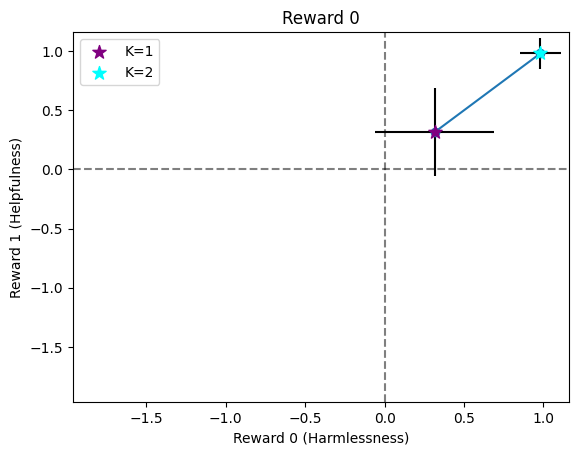

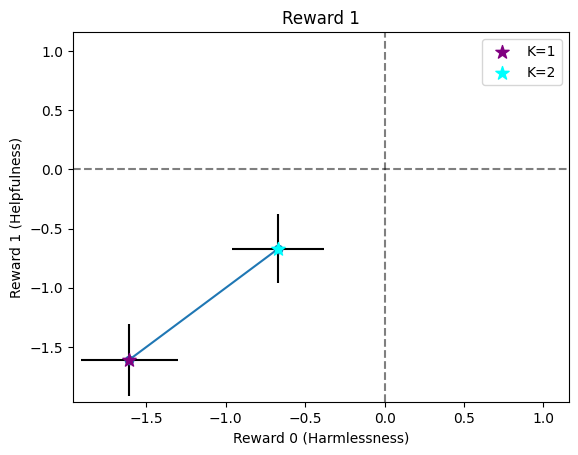

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

rewards_total = np.concatenate(
    [results_total[idx_reward][K]["reward"] for K in Ks for idx_reward in range(2)],
    axis=0
)
print(rewards_total)
ylim = [
    rewards_total[:, 1].min()-0.05,
    rewards_total[:, 1].max()+0.05
]
xlim = [
    rewards_total[:, 0].min()-0.05,
    rewards_total[:, 0].max()+0.05
]
for idx_reward in range(2): # refer to names_rmodel
  reward_mean = np.array([results_total[idx_reward][K]["reward"].mean(axis=0) for K in Ks])
  reward_std = np.array([results_total[idx_reward][K]["reward"].std(axis=0) for K in Ks])

  plt.title(f"Reward {idx_reward}")
  # plt.plot(
  #     reward_mean[:, 0],
  #     reward_mean[:, 1],
  #     marker="o"
  # )
  plt.errorbar(
      reward_mean[:, 0], # x values
      reward_mean[:, 1], # y values
      xerr=reward_std[:, 0], # y-axis std
      yerr=reward_std[:, 1], # y-axis std
      marker="o",
      # color="black",
      ecolor="black",
  )
  plt.scatter(
      reward_mean[0, 0],
      reward_mean[0, 1],
      marker="*",
      color="purple",
      s=100,
      label="K=" + str(Ks[0]),
      zorder=100
  )
  plt.scatter(
      reward_mean[-1, 0],
      reward_mean[-1, 1],
      marker="*",
      color="cyan",
      s=100,
      label="K=" + str(Ks[-1]),
      zorder=100
  )
  plt.axhline(0.0, color="black", linestyle="--", alpha=0.5)
  plt.axvline(0.0, color="black", linestyle="--", alpha=0.5)
  plt.xlabel("Reward 0 (Harmlessness)")
  plt.ylabel("Reward 1 (Helpfulness)")
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.legend()
  # plt.xticks(Ks)
  plt.show()
  plt.close()